In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib
from datetime import datetime, timedelta

matplotlib.rcParams['mathtext.fontset'] = 'cm' # computer modern
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
# Goal: find number of submitted papers as a function of time before the deadline (16:00 ET / UTC-4:00)
# https://arxiv.org/help/api

In [3]:
# Example

url = 'http://export.arxiv.org/api/query?search_query=all:electron&start=0&max_results=1'
data = urllib.urlopen(url).read()
print data

<?xml version="1.0" encoding="UTF-8"?>
<feed xmlns="http://www.w3.org/2005/Atom">
  <link href="http://arxiv.org/api/query?search_query%3Dall%3Aelectron%26id_list%3D%26start%3D0%26max_results%3D1" rel="self" type="application/atom+xml"/>
  <title type="html">ArXiv Query: search_query=all:electron&amp;id_list=&amp;start=0&amp;max_results=1</title>
  <id>http://arxiv.org/api/cHxbiOdZaP56ODnBPIenZhzg5f8</id>
  <updated>2019-05-06T00:00:00-04:00</updated>
  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">144759</opensearch:totalResults>
  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>
  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">1</opensearch:itemsPerPage>
  <entry>
    <id>http://arxiv.org/abs/cond-mat/0102536v1</id>
    <updated>2001-02-28T20:12:09Z</updated>
    <published>2001-02-28T20:12:09Z</published>
    <title>Impact of Electron-Electron Cusp on Configur

In [4]:
# All 2019 astro-ph papers
# https://arxiv.org/search/astro-ph?query=2019&searchtype=all&abstracts=show&order=-announced_date_first&size=50


# https://stackoverflow.com/questions/8405087/what-is-this-date-format-2011-08-12t201746-384z

# "yyyy-MM-dd'T'HH:mm:ss.SSS'Z'" means UTC time

num_results = 5000
time_stamps = []

url = 'http://export.arxiv.org/api/query?search_query=2019&\
all:astro-ph&start=0&max_results=%s&sortBy=submittedDate&sortOrder=ascending' % (num_results)

data = urllib.urlopen(url).read()

for line in data.splitlines(): # iterate through string with newlines \n
    
    if '<published>' in line: # get submission time
        
        item = line.split('<published>')[1].split('</published>')[0]
        item_clean = datetime.strptime(item,"%Y-%m-%dT%H:%M:%SZ")
        
        #print item_clean # Separate date and time
        #print item_clean.time() # Print time
        
        # Deadline 22:00 UTC (16:00 ET)
        item_delta = item_clean - datetime.strptime('22:00', '%H:%M')
        
        # Final array
        time_stamps.append(str(item_delta).split(',',1)[1])

In [5]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [6]:
elapsed_time = []


for item in time_stamps:
    
    # Normalize if greater than 12h
    tel = get_sec(item) / 3600.
    
    if tel < 12:
        
        elapsed_time.append(tel) 
    
    else:
        
        elapsed_time.append(tel - 12)

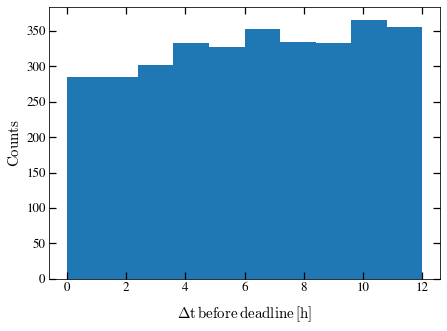

In [7]:
fig, ax = plt.subplots(figsize=(7,5))

plt.hist(elapsed_time);

plt.xlabel(r'$\rm{\Delta t \, before \, deadline \, [h]}$', fontsize=15, labelpad=10);
plt.ylabel(r'$\rm{Counts}$', fontsize=15);

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13) 

ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')

ax.tick_params(which='both', width=1.25)
ax.tick_params(which='major', length=7)